In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def Pathloss(dis_array):
  d=dis_array
  result=32.4+20*np.log10(2400)+np.log10(d)*20
  return result

In [22]:
def creat_label(ball):
  target=[]
  for i in range(len(ball)):
    if(2<=ball[i][0]<=12.97 and 2<=ball[i][1]<=13.89):
      target.append(1)
    else:
      target.append(0)
  return np.array(target)  

# LSTM to predict the location of dropoint of tennis ball

In [ ]:
N=500
x_boundary=12.97
y_boundary=13.89
s_cor=np.array([[0,0],[14.97,0],[0,15.89],[14.97,15.89]])
np.random.seed(5)
x=np.random.uniform(low=0,high=14.97,size=N)
y=np.random.uniform(low=0,high=15.89,size=N)

In [ ]:
t_cor=[]
temp=[]
for i in range(N):
  temp.append(x[i])
  temp.append(y[i])
  t_cor.append(temp)
  temp=[]
dis=[]
#compute the distance
for i in range(N):
  dis.append(list(np.linalg.norm((t_cor[i]-s_cor),axis=1)))

In [ ]:
dis_array=np.array(dis)
fsl=Pathloss(dis_array)
RSS=10+24-fsl

In [ ]:
data=RSS
label=np.array(t_cor)
x_train,x_test,y_train,y_test=train_test_split(data,label,random_state=42,test_size=0.2)

In [ ]:
scale=StandardScaler()
scale.fit(x_train)
x_train_s=scale.transform(x_train).astype('float64')
x_test_s=scale.transform(x_test)
x_train_rnn=x_train_s.reshape(-1,1,4)
x_test_rnn=x_test_s.reshape(-1,1,4)

In [ ]:
def model():
  
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(32,activation='sigmoid'))
  model.add(tf.keras.layers.Dense(16,activation='sigmoid'))
  model.add(tf.keras.layers.Dense(8,activation='sigmoid'))
  model.add(tf.keras.layers.Dense(4,activation='sigmoid'))
  model.add(tf.keras.layers.Dense(2))
  return model

In [ ]:
def RNN():
  
  model = tf.keras.Sequential()
  model.add(layers.LSTM(24,input_shape=(1,4),return_sequences=True))
  # model.add(layers.LSTM(24,return_sequences=True))
  model.add(layers.LSTM(24))
  model.add(layers.Dense(2))
  return model

In [ ]:
mlp=RNN()
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 24)             2784      
_________________________________________________________________
lstm_1 (LSTM)                (None, 24)                4704      
_________________________________________________________________
dense (Dense)                (None, 2)                 50        
Total params: 7,538
Trainable params: 7,538
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp=RNN()
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau('loss',patience=3,factor=0.3,min_lr=0.00001)
mlp.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, ),
      loss='mse',
      metrics=['mae'])
history_mlp=mlp.fit(
    x_train_rnn,y_train,
    epochs=2000,
    batch_size=10,
    validation_split=0.2,
    validation_freq=1,
)

Epoch 1/2000
32/32 [==============================] - 1s 23ms/step - loss: 77.0781 - mae: 7.5761 - val_loss: 80.2615 - val_mae: 7.8237
Epoch 2/2000
32/32 [==============================] - 0s 3ms/step - loss: 75.2982 - mae: 7.4856 - val_loss: 77.8114 - val_mae: 7.7032
Epoch 3/2000
32/32 [==============================] - 0s 2ms/step - loss: 71.9321 - mae: 7.3170 - val_loss: 72.4360 - val_mae: 7.4405
Epoch 4/2000
32/32 [==============================] - 0s 2ms/step - loss: 64.6347 - mae: 6.9444 - val_loss: 60.9242 - val_mae: 6.8420
Epoch 5/2000
32/32 [==============================] - 0s 3ms/step - loss: 51.7514 - mae: 6.2260 - val_loss: 44.4865 - val_mae: 5.8658
Epoch 6/2000
32/32 [==============================] - 0s 3ms/step - loss: 36.6750 - mae: 5.2580 - val_loss: 29.6361 - val_mae: 4.8378
Epoch 7/2000
32/32 [==============================] - 0s 3ms/step - loss: 24.3919 - mae: 4.3189 - val_loss: 19.7009 - val_mae: 4.0024
Epoch 8/2000
32/32 [==============================] - 0s 2ms/

In [ ]:
mlp.save('/659rnn.h5')

In [ ]:
prediction=mlp.predict(x_test_rnn)
result=[]
for i in range(len(prediction)):
  a=np.abs(prediction[i]-y_test[i])
  b=sum(a)
  result.append(b/2)
mae_test=sum(result)/len(result)
mae_test

0.011926393276740664

In [ ]:
ture_out=creat_label(y_test)
prediction_out=creat_label(prediction)

In [ ]:
accuracy=0
for i in range(len(ture_out)):
  if (ture_out[i]==prediction_out[i]):
    accuracy=accuracy+1
accuracy/len(ture_out)*100

100.0

In [ ]:
from keras.models import load_model
model_score = mlp.evaluate(x_test_rnn, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 2.1721e-04 - mae: 0.0119


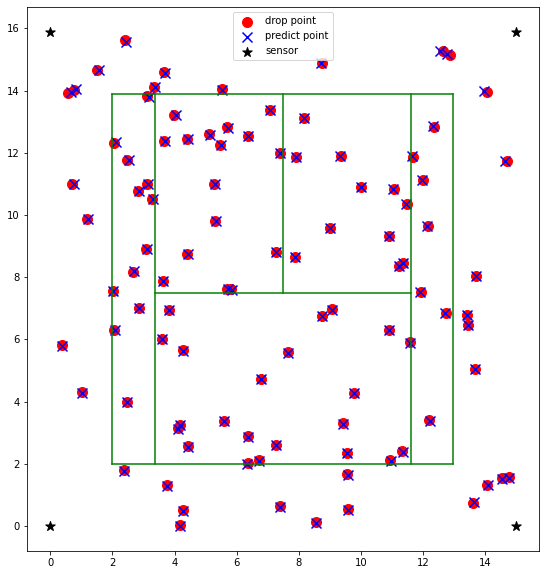

In [ ]:
plt.figure(figsize=(18,10))
plt.plot([2,12.97],[2,2],c='green')
plt.plot([2,12.97],[13.89,13.89],c='green')
plt.plot([3.37,3.37],[2,13.89],c='green')
plt.plot([11.6,11.6],[2,13.89],c='green')
plt.plot([2,2],[2,13.89],c='green')
plt.plot([12.97,12.97],[2,13.89],c='green')
plt.plot([3.37,11.6],[7.49,7.49],c='green')
plt.plot([7.485,7.485],[7.49,13.89],c='green')
plt.scatter(y_test[:,0],y_test[:,1],marker='o',c='red',s=100,label="drop point")
plt.scatter(prediction[:,0],prediction[:,1],marker='x',c='blue',s=100,label="predict point")
plt.scatter(s_cor[:,0],s_cor[:,1],marker='*',c='black',s=100,label="sensor")
plt.gca().set_aspect('equal',adjustable='box')
plt.legend()

Text(0.5, 1.0, 'The Mae of Training')

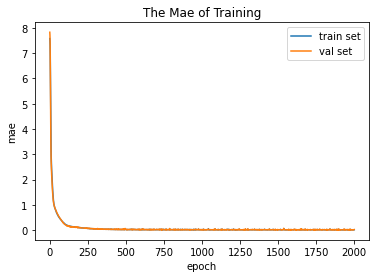

In [ ]:
plt.plot(history_mlp.history['mae'],label="train set")
plt.plot(history_mlp.history['val_mae'],label="val set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("mae")
plt.title("The Mae of Training")

Text(0.5, 1.0, 'The Loss of Training')

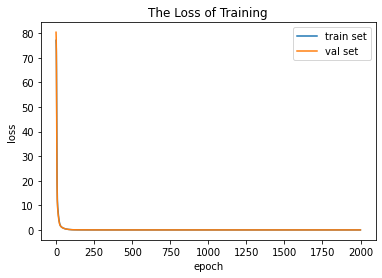

In [ ]:
plt.plot(history_mlp.history['loss'],label="train set")
plt.plot(history_mlp.history['val_loss'],label="val set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The Loss of Training")

# MLP model predict out or not according input class 0 class 1

In [23]:
N=500
t_cor_cnn=[]
np.random.seed(5)
x=np.random.uniform(low=0,high=(x_boundary+2),size=N)
y=np.random.uniform(low=0,high=(y_boundary+2),size=N)
t_cor=[]
temp=[]
for i in range(N):
  temp.append(x[i])
  temp.append(y[i])
  t_cor_cnn.append(temp)
  temp=[]
dis=[]
#compute the distance
for i in range(N):
  dis.append(list(np.linalg.norm((t_cor_cnn[i]-s_cor),axis=1)))
dis_array=np.array(dis)
fsl=Pathloss(dis_array)
RSS=10+24-fsl

In [24]:
data=RSS
label=np.array(creat_label(t_cor_cnn))
x_train,x_test,y_train,y_test=train_test_split(data,label,random_state=42,test_size=0.2)

In [25]:
scale=StandardScaler()
scale.fit(x_train)
x_train_m=scale.transform(x_train).astype('float64')
x_test_m=scale.transform(x_test)

In [26]:
def model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(32,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(32,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
  return model

In [27]:
model=model()
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau('loss',patience=3,factor=0.3,min_lr=0.00001)
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, ),
      loss='binary_crossentropy',
      metrics=['accuracy'])
history_model=model.fit(
    x_train_m,y_train,
    epochs=800,
    batch_size=10,
    validation_split=0.2,
    validation_freq=1,
)

Epoch 1/800
32/32 [==============================] - 0s 6ms/step - loss: 0.7264 - accuracy: 0.5188 - val_loss: 0.6794 - val_accuracy: 0.4500
Epoch 2/800
32/32 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.4875 - val_loss: 0.6557 - val_accuracy: 0.4625
Epoch 3/800
32/32 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.5437 - val_loss: 0.6406 - val_accuracy: 0.5250
Epoch 4/800
32/32 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.6219 - val_loss: 0.6280 - val_accuracy: 0.5625
Epoch 5/800
32/32 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.6500 - val_loss: 0.6128 - val_accuracy: 0.6500
Epoch 6/800
32/32 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.6906 - val_loss: 0.5965 - val_accuracy: 0.6875
Epoch 7/800
32/32 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.6906 - val_loss: 0.5807 - val_accuracy: 0.7125
Epoch 8/800
3

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (10, 32)                  160       
_________________________________________________________________
dropout (Dropout)            (10, 32)                  0         
_________________________________________________________________
dense_1 (Dense)              (10, 32)                  1056      
_________________________________________________________________
dropout_1 (Dropout)          (10, 32)                  0         
_________________________________________________________________
dense_2 (Dense)              (10, 1)                   33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.evaluate(x_test_m,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9700


[0.2102479338645935, 0.9700000286102295]

Text(0.5, 1.0, 'The Loss of Training')

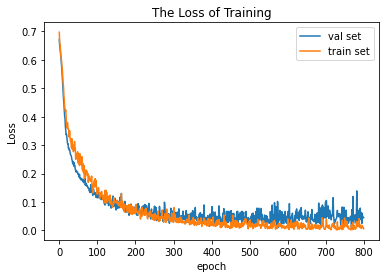

In [ ]:
plt.plot(history_model.history['val_loss'],label="val set")
plt.plot(history_model.history['loss'],label="train set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.title("The Loss of Training")

Text(0.5, 1.0, 'The Accuracy of Training')

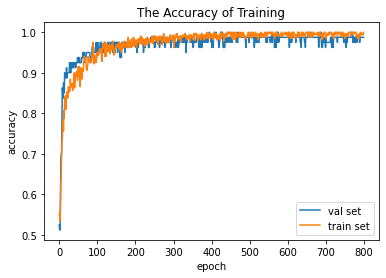

In [ ]:
plt.plot(history_model.history['val_accuracy'],label="val set")
plt.plot(history_model.history['accuracy'],label="train set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("The Accuracy of Training")

## Confusion maxtrix

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Text(0.5, 1.0, 'Matrix confusion of MLP')

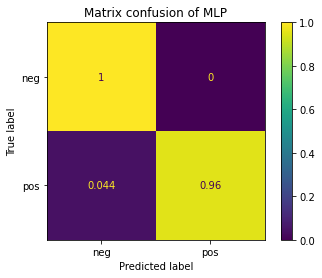

In [35]:
prediction_model=model.predict_classes(x_test_m)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
matirx=confusion_matrix(y_test, prediction_model,normalize='true')
ConfusionMatrixDisplay(matirx,display_labels=['neg','pos']).plot()
plt.title("Matrix confusion of MLP")

## ROC

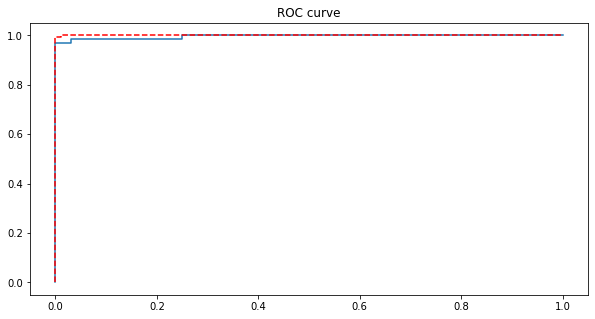

In [39]:
train_proba = model.predict_proba(x_train_m)
test_proba = model.predict_proba(x_test_m)
from sklearn import metrics

fpr_test, tpr_test, th_test = metrics.roc_curve(y_test, test_proba)
fpr_train, tpr_train, th_train = metrics.roc_curve(y_train, train_proba)
plt.figure(figsize=[10, 5])
plt.plot(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train,"r--")
plt.title('ROC curve')
plt.show()

## F1 score

In [38]:
print(metrics.classification_report(y_test, prediction_model))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       1.00      0.96      0.98        68

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



# SVM based method

0.96


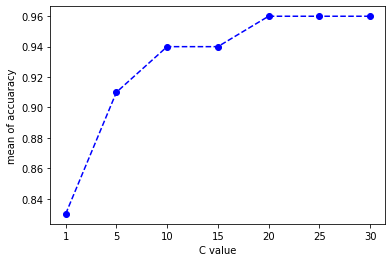

In [ ]:
from sklearn import svm
parameters=[1,5,10,15,20,25,30]
result=[]
for i in parameters:
    clf = svm.SVC(C=i)
    clf.fit(x_train_m,y_train)
    result.append(clf.score(x_test_m,y_test))
parameters_str = [str(j) for j in parameters]
plt.plot(parameters_str,result,color='b',marker='o',linestyle='dashed')
plt.xlabel('C value')
plt.ylabel('mean of accuaracy')
max_index=result.index(max(result))
parameter=parameters[max_index]
print(max(result))

0.96


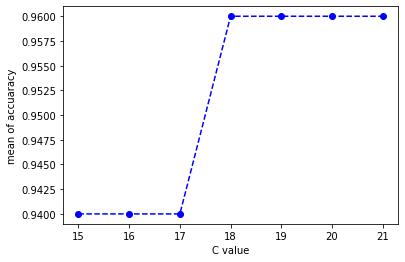

In [ ]:
parameters=[15,16,17,18,19,20,21]
result=[]
for i in parameters:
    clf = svm.SVC(C=i)
    clf.fit(x_train_m,y_train)
    result.append(clf.score(x_test_m,y_test))
parameters_str = [str(j) for j in parameters]
plt.plot(parameters_str,result,color='b',marker='o',linestyle='dashed')
plt.xlabel('C value')
plt.ylabel('mean of accuaracy')
max_index=result.index(max(result))
parameter=parameters[max_index]
print(max(result))

## Confusion matrix

Text(0.5, 1.0, 'Matrix confusion of SVM')

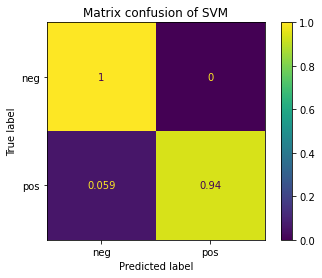

In [31]:
prediction_svm=clf.predict(x_test_m)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
matirx=confusion_matrix(y_test, prediction_svm,normalize='true')
ConfusionMatrixDisplay(matirx,display_labels=['neg','pos']).plot()
plt.title("Matrix confusion of SVM")

## ROC curve

(8,)
(8,)
(8,)
0.998448603743369


<Figure size 432x288 with 0 Axes>

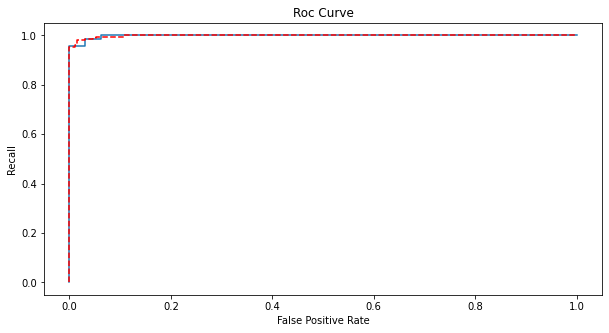

-0.0070993516312540805


In [37]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve
clf_proba = clf.fit(x_train_m, y_train)

FPR, recall, thresholds = roc_curve(y_test,clf_proba.decision_function(x_test_m), pos_label=1)
FPR_train, recall_train, thresholds_train = roc_curve(y_train,clf_proba.decision_function(x_train_m), pos_label=1)

print(FPR.shape)        # (45,))
print(recall.shape)     # (45,))
print(thresholds.shape) # (45,))

area = AUC(y_train,clf_proba.decision_function(x_train_m))
print(area)     # 0.9696400000000001

plt.figure()
plt.figure(figsize=(10,5))
plt.plot(FPR, recall
         ,label='ROC curve (area = %0.2f)' % area)
plt.plot(FPR_train, recall_train, "r--"
         ,label='ROC curve (area = %0.2f)' % area)
#plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Roc Curve')
#plt.legend(loc="lower right")

plt.show()

maxindex = (recall - FPR).tolist().index(max(recall - FPR))
print(thresholds[maxindex])     # -1.0860191749391461

## F1 score

In [33]:
#print(metrics.classification_report(y_test, prediction_svm))
from sklearn.metrics import confusion_matrix as CM, precision_score as P, recall_score as R, f1_score
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_svm))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        32
           1       1.00      0.94      0.97        68

    accuracy                           0.96       100
   macro avg       0.94      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100

